# 🌀 t-SNE: t-Distributed Stochastic Neighbour Embedding

**t-SNE (t-Distributed Stochastic Neighbour Embedding)** is a powerful tool for visualising **high-dimensional data** in 2 or 3 dimensions. Unlike PCA, which captures global variance linearly, t-SNE focuses on preserving **local similarities** — so points that are close in high-dimensional space remain close in the visualisation.

---

### 🧭 How t-SNE Embeds Points in 2D

1. Computes **pairwise similarities in high-dimensional space** using a **Gaussian kernel**. For each point $x_i$, the similarity to $x_j$ is defined as a conditional probability:

   $$
   p_{j|i} = \frac{\exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma_i^2}\right)}{\sum_{k \neq i} \exp\left(-\frac{\|x_i - x_k\|^2}{2\sigma_i^2}\right)}
   $$

   The final joint probability is symmetrised as:

   $$
   p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}
   $$

   where $n$ is the number of samples.

2. Randomly **initializes all points in 2D** (or optionally uses PCA).

3. Computes similarities in 2D using a **Student’s t-distribution** with 1 degree of freedom (Cauchy distribution), which has heavy tails:

   $$
   q_{ij} = \frac{\left(1 + \|y_i - y_j\|^2\right)^{-1}}{\sum_{k \neq l} \left(1 + \|y_k - y_l\|^2\right)^{-1}}
   $$

   This allows dissimilar points to be spread apart more in low-dimensional space, solving the “crowding problem”.

4. Minimises the difference between $P$ and $Q$ by **gradient descent**.

This optimization process continues for many iterations (often 250–1000), adjusting point positions until a meaningful low-dimensional layout emerges.

---

### 🔍 When to Use t-SNE?

- To **visualise** structure and clusters in high-dimensional data.
- When PCA doesn’t clearly separate groups.
- For **exploratory analysis** — axes don’t have interpretable meaning.

⚠️ t-SNE is **non-deterministic** unless you fix the `random_state`, and **computationally expensive**, so it’s often applied **after PCA** for dimensionality reduction.


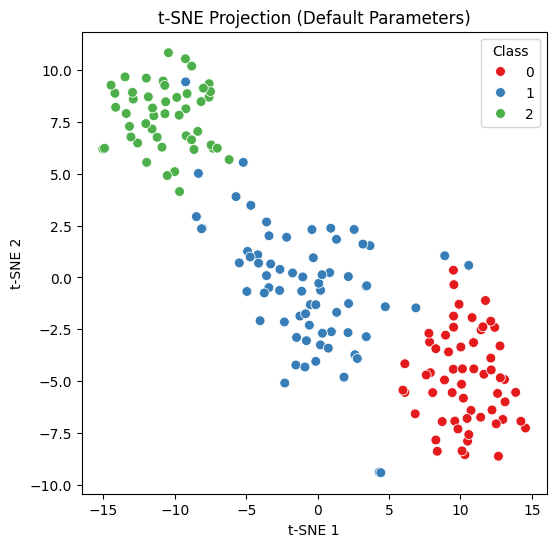

In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

# Load and scale the data
data = load_wine()
X = StandardScaler().fit_transform(data.data)
y = data.target

# Apply t-SNE with default settings
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualise
plt.figure(figsize=(6,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette="Set1", s=50)
plt.title("t-SNE Projection (Default Parameters)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Class")
plt.show()


### 🔍 Default t-SNE Projection

This is a 2D projection of the wine dataset using t-SNE with default parameters.

Unlike PCA, t-SNE focuses on maintaining the **local neighbourhood structure**, often revealing clusters more clearly — even if the axes themselves don’t have interpretable meanings.

The colouring reflects the true wine cultivars (used only for validation, not during fitting).


### 🔧 Perplexity: Balancing Local vs Global Structure

**Perplexity** controls how t-SNE balances **local** vs **global** relationships between data points.

- Think of it as the **effective number of nearest neighbors** used for each point.
- Typical values are between **5 and 50**.
- Smaller perplexity emphasizes **local details**, while larger values consider a **broader neighborhood**.

t-SNE adapts its similarity distribution to match this level of neighborhood complexity.

Let’s see how different perplexity values affect the shape and separation of clusters.


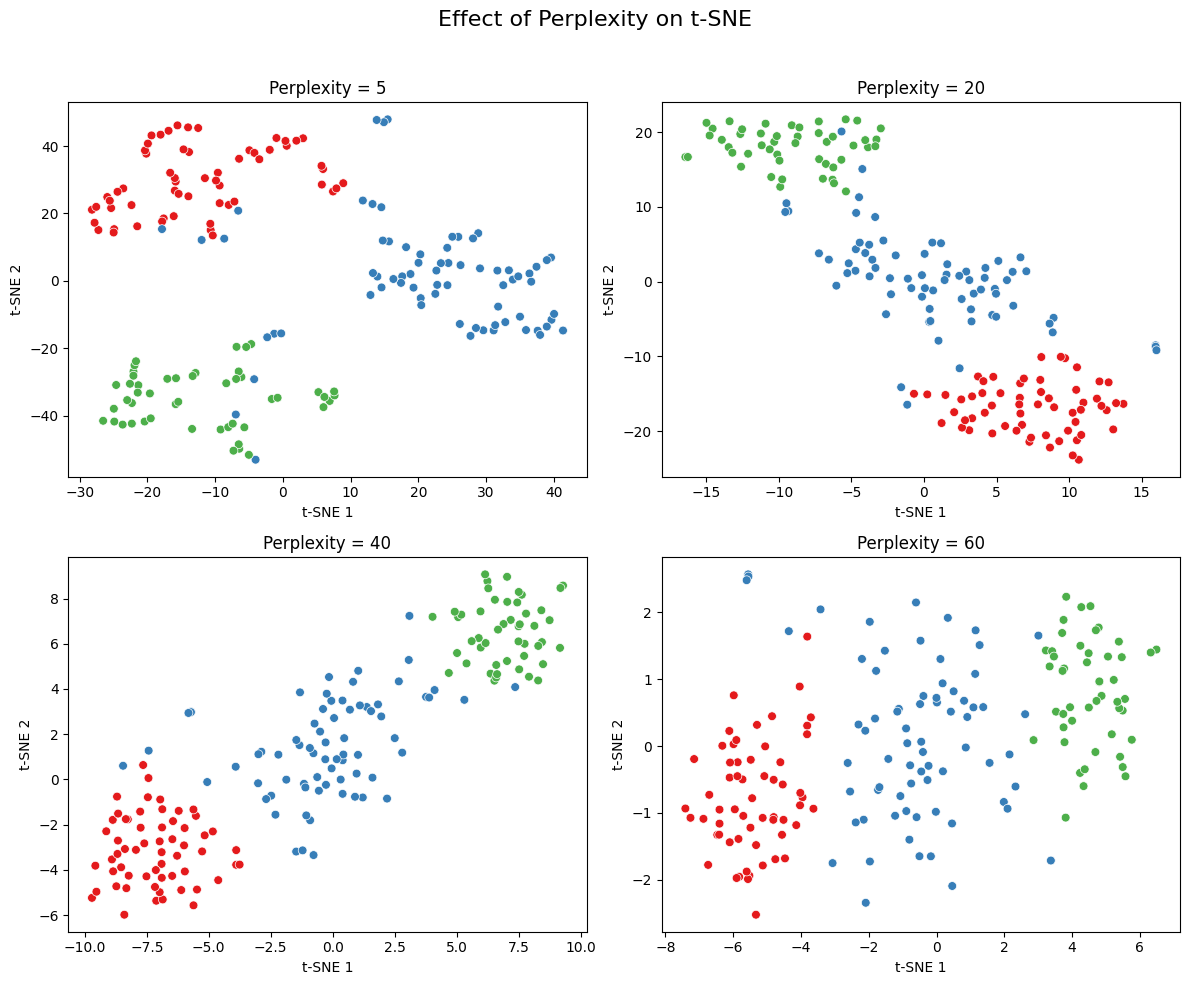

In [2]:
perplexities = [5, 20, 40, 60]
fig, axes = plt.subplots(2, 2, figsize=(12,10))

for ax, perp in zip(axes.flat, perplexities):
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
    X_tsne = tsne.fit_transform(X)
    sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette="Set1", s=40, ax=ax, legend=False)
    ax.set_title(f"Perplexity = {perp}")
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")

plt.suptitle("Effect of Perplexity on t-SNE", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### 🔧 Learning Rate: Controlling Step Size in Optimisation

The **learning rate** in t-SNE controls how fast the algorithm updates point positions during optimisation.

- A value **too small** may get stuck in poor local minima or collapse the points into tight blobs.
- A value **too large** may overshoot and produce scattered, noisy results.
- Good values often lie in the range **10 to 1000**, depending on the dataset.

Let’s visualise how different learning rates affect the projection.


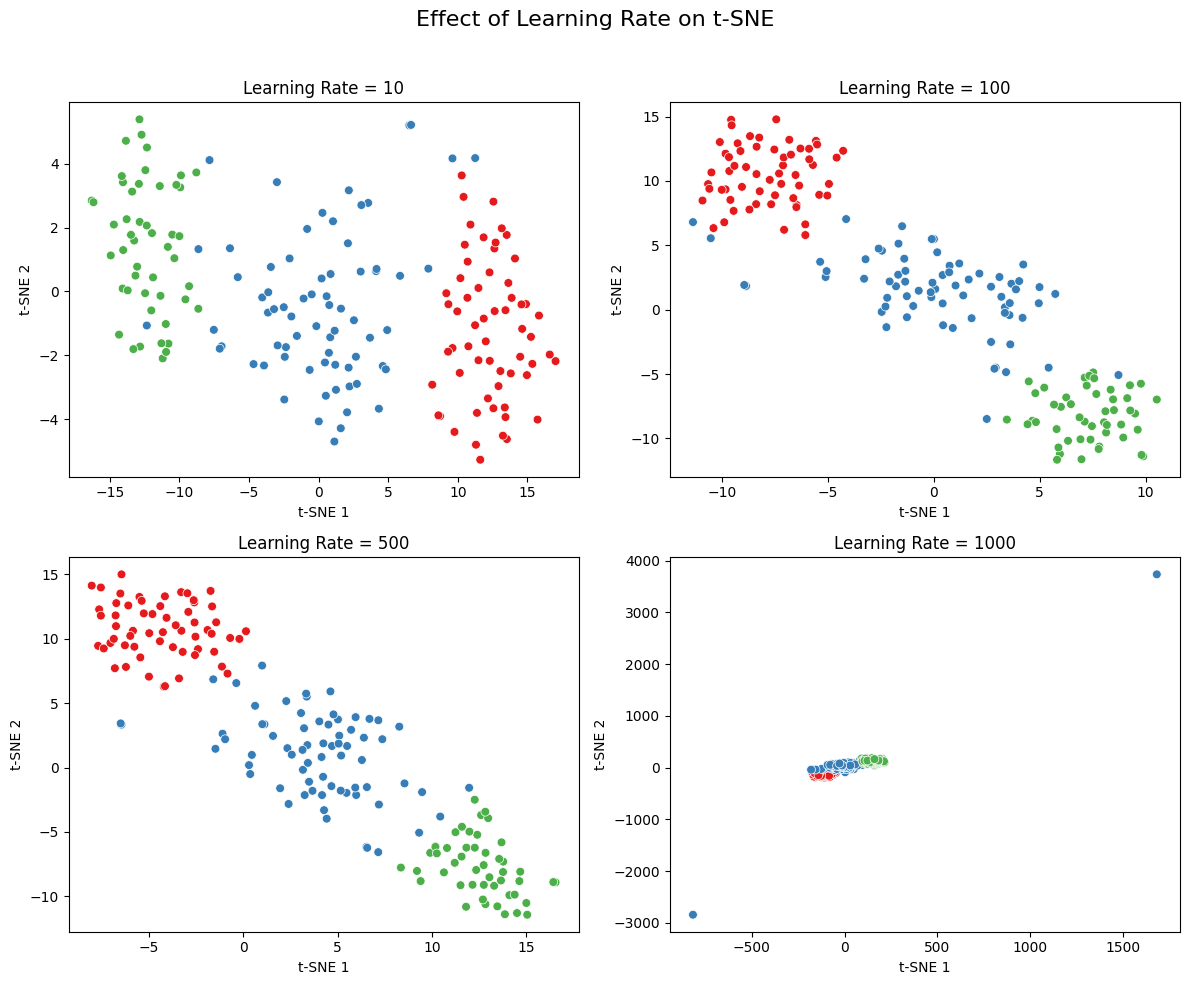

In [3]:
learning_rates = [10, 100, 500, 1000]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, lr in zip(axes.flat, learning_rates):
    tsne = TSNE(n_components=2, learning_rate=lr, random_state=42)
    X_tsne = tsne.fit_transform(X)
    sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette="Set1", s=40, ax=ax, legend=False)
    ax.set_title(f"Learning Rate = {lr}")
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")

plt.suptitle("Effect of Learning Rate on t-SNE", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### 🔧 n_iter: Number of Optimisation Steps

The `n_iter` parameter sets how many iterations t-SNE runs to optimise the low-dimensional embedding.

- t-SNE starts with a random or PCA-based initial layout and iteratively adjusts it.
- **More iterations** usually lead to better convergence, but with diminishing returns.
- Values below **250** may not converge well; **≥1000** is commonly used.

Let’s explore how the number of iterations affects cluster stability and separation.


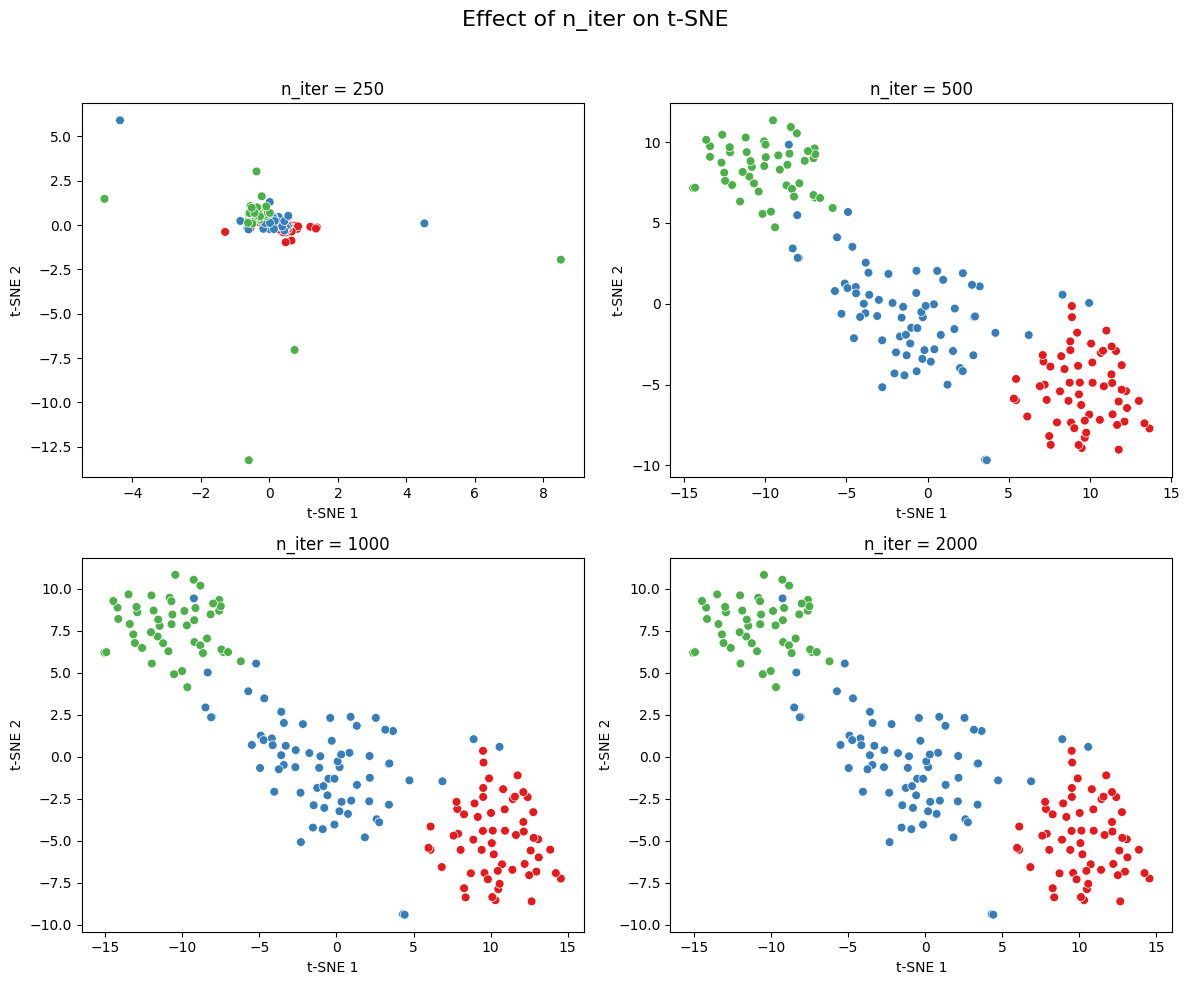

In [4]:
n_iters = [250, 500, 1000, 2000]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, n in zip(axes.flat, n_iters):
    tsne = TSNE(n_components=2, max_iter=n, random_state=42)
    X_tsne = tsne.fit_transform(X)
    sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette="Set1", s=40, ax=ax, legend=False)
    ax.set_title(f"n_iter = {n}")
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")

plt.suptitle("Effect of n_iter on t-SNE", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### 🔍 Side-by-Side Comparison: Raw Features vs PCA vs t-SNE

Below we compare three ways of reducing dimensionality to 2D for visualisation:

1. **Two Raw Features**: No transformation — simply plot two original dimensions.
2. **PCA (2 components)**: Linear transformation that captures maximum variance.
3. **t-SNE (2 components)**: Nonlinear projection that preserves local similarities.

Each plot uses the same wine labels as color. This highlights how well-separated the clusters are under each method.


Silhouette Score (Raw Features): 0.4841
Silhouette Score (PCA): 0.5611
Silhouette Score (t-SNE): 0.6071


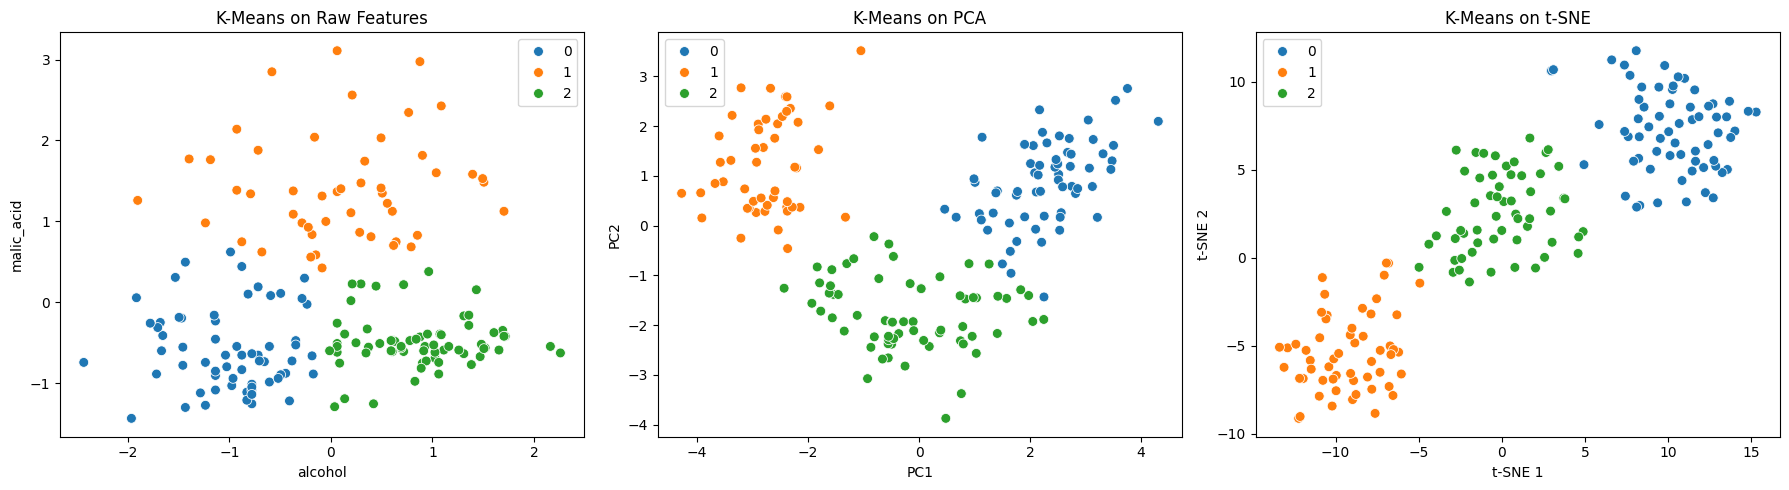

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

# Clustering
def cluster_and_score(X_proj, name):
    kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_proj)
    score = silhouette_score(X_proj, labels)
    print(f"Silhouette Score ({name}): {score:.4f}")
    return labels

# Fit
X_raw = X[:, :2]
X_pca = PCA(n_components=2).fit_transform(X)
X_tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=1000, random_state=42).fit_transform(X)

labels_raw = cluster_and_score(X_raw, "Raw Features")
labels_pca = cluster_and_score(X_pca, "PCA")
labels_tsne = cluster_and_score(X_tsne, "t-SNE")

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Raw
sns.scatterplot(x=X_raw[:, 0], y=X_raw[:, 1], hue=labels_raw, palette="tab10", s=50, ax=axes[0])
axes[0].set_title("K-Means on Raw Features")
axes[0].set_xlabel(data.feature_names[0])
axes[0].set_ylabel(data.feature_names[1])

# PCA
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_pca, palette="tab10", s=50, ax=axes[1])
axes[1].set_title("K-Means on PCA")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

# t-SNE
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels_tsne, palette="tab10", s=50, ax=axes[2])
axes[2].set_title("K-Means on t-SNE")
axes[2].set_xlabel("t-SNE 1")
axes[2].set_ylabel("t-SNE 2")

plt.tight_layout()
plt.show()
